### KNN(k-Nearest Neighbors, KNN, k-최근접이웃) 알고리즘

`kNN`은 지도학습중 분류문제에 사용하는 알고리즘이다. 분류문제란 새로운 데이터가 들어 왔을 때 기존 데이터의 그룹중 "언 떤 그룹에 속하는 가를 분류"하는 문제이다

`kNN`알고리즘은 지도학습(Supervised Learning)의 한 종류로 레이블(정답)이 있는 데이터를 사용하여 분류작업을 하는 알고리즘이다. 알고리즘의 이름에서 볼수 있듯이 데이터로부터 `거리가 가까운 k개`의 다른 데이터의 레이블을 참조하여 분류하는 알고리즘이다.

<img src="./images/28.머신러닝_지도학습_4_KNN_01.png" width="500" height="400">

###### kNN의 장점

* 알고리즘이 간단하여 구현하기가 쉽다.
* 수치 기반 데이터 분류작업세 성능이 좋다.

###### kNN의 단점

* 학습 데이터의 양이 많으면 분류속도가 느려진다(사실 사전계산을 할 수 없기 때문에 학습과정이 따로 없기 때문에 분류속도가 느리다)
* 차원(벡터)의 크기가 크면 계산량이 많아진다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

###### 실습 1. kNN-forge 데이타셋

In [2]:
import mglearn
from sklearn.model_selection import train_test_split

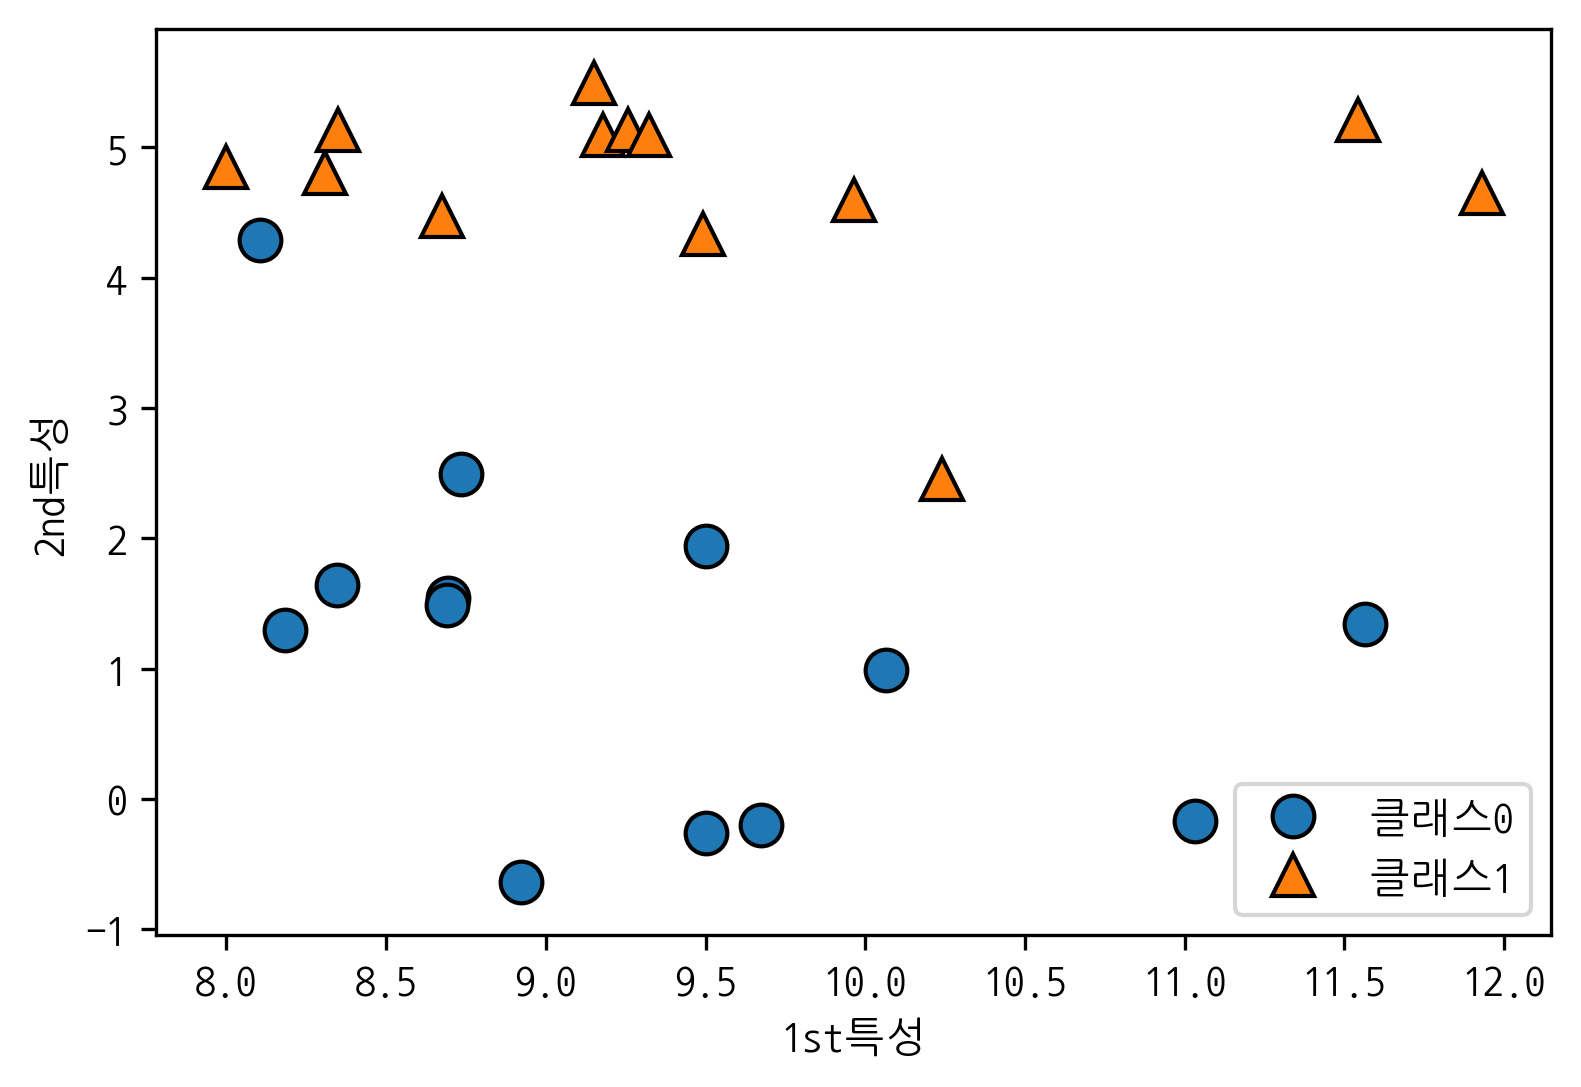

X.shape: (26, 2)


In [3]:
# forge데이셋을 생성 : kNN을 실습하기 위해 인위적으로 만들어 놓은 데이터셋
X, y = mglearn.datasets.make_forge()
#print(X[:5])
#print(y[:5])

# 산점도그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스0", "클래스1"], loc=4)
plt.xlabel('1st특성')
plt.ylabel('2nd특성')
plt.show()

# 데이터포인트 26개와 2개의 특성
print('X.shape: {}'.format(X.shape))

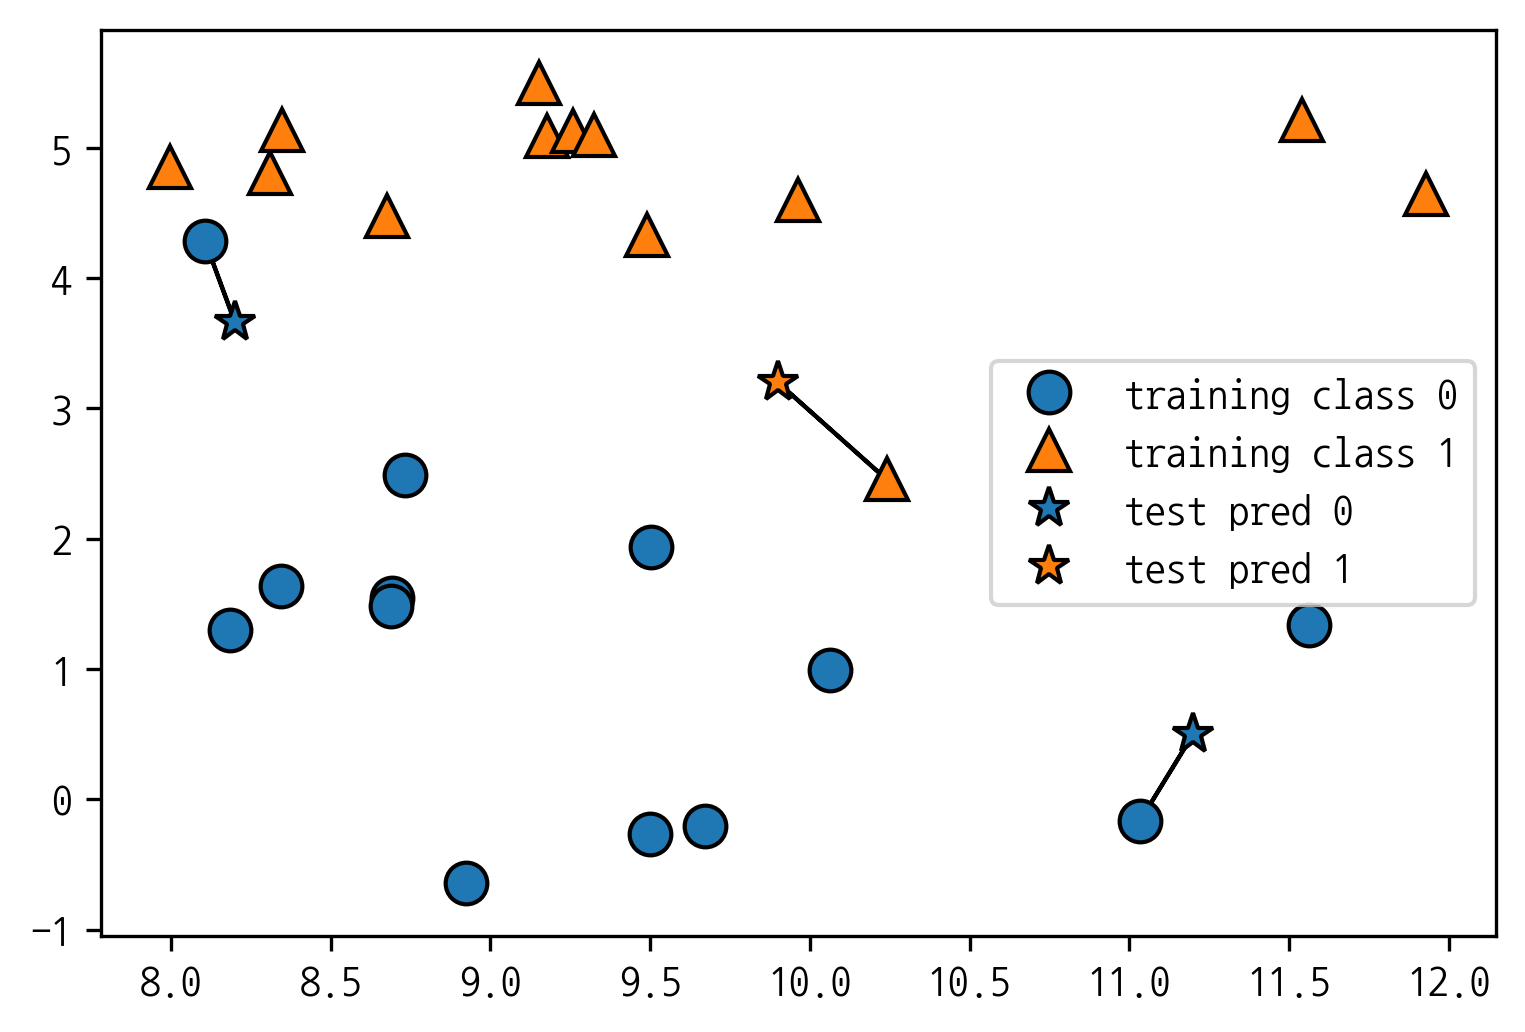

In [4]:
# k=1일 경우(최근접 이웃을 1개로 기준해서 분류)
mglearn.plots.plot_knn_classification(n_neighbors=1)

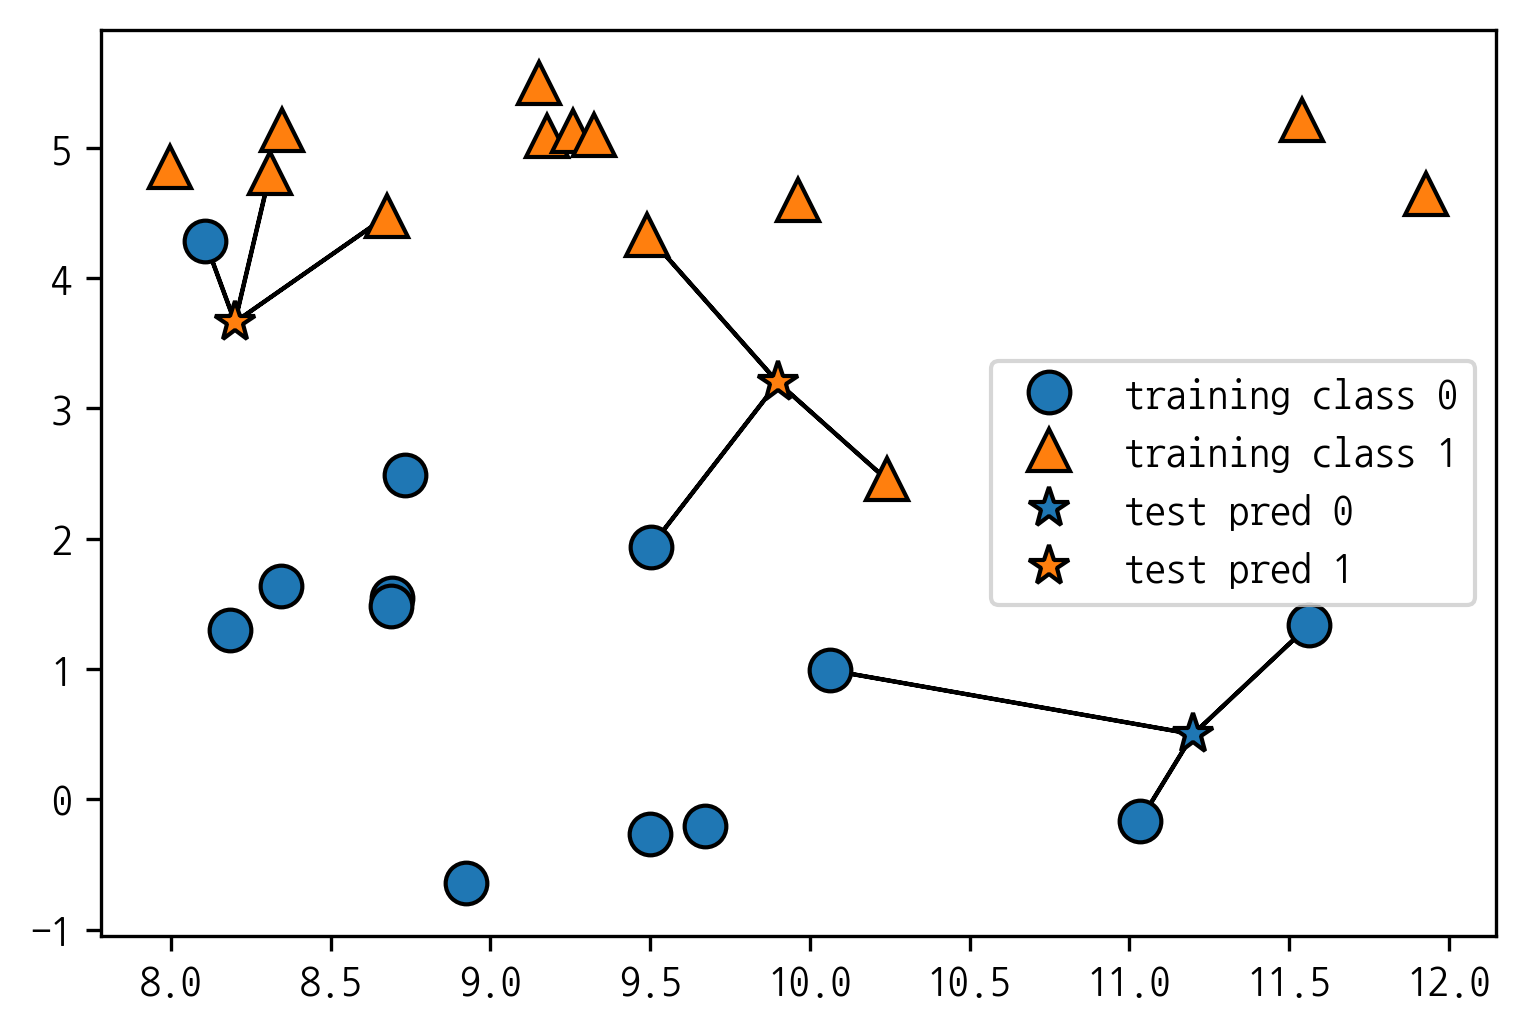

In [5]:
# k=3일 경우(최근접 이웃을 3개로 기준해서 분류)
mglearn.plots.plot_knn_classification(n_neighbors=3)

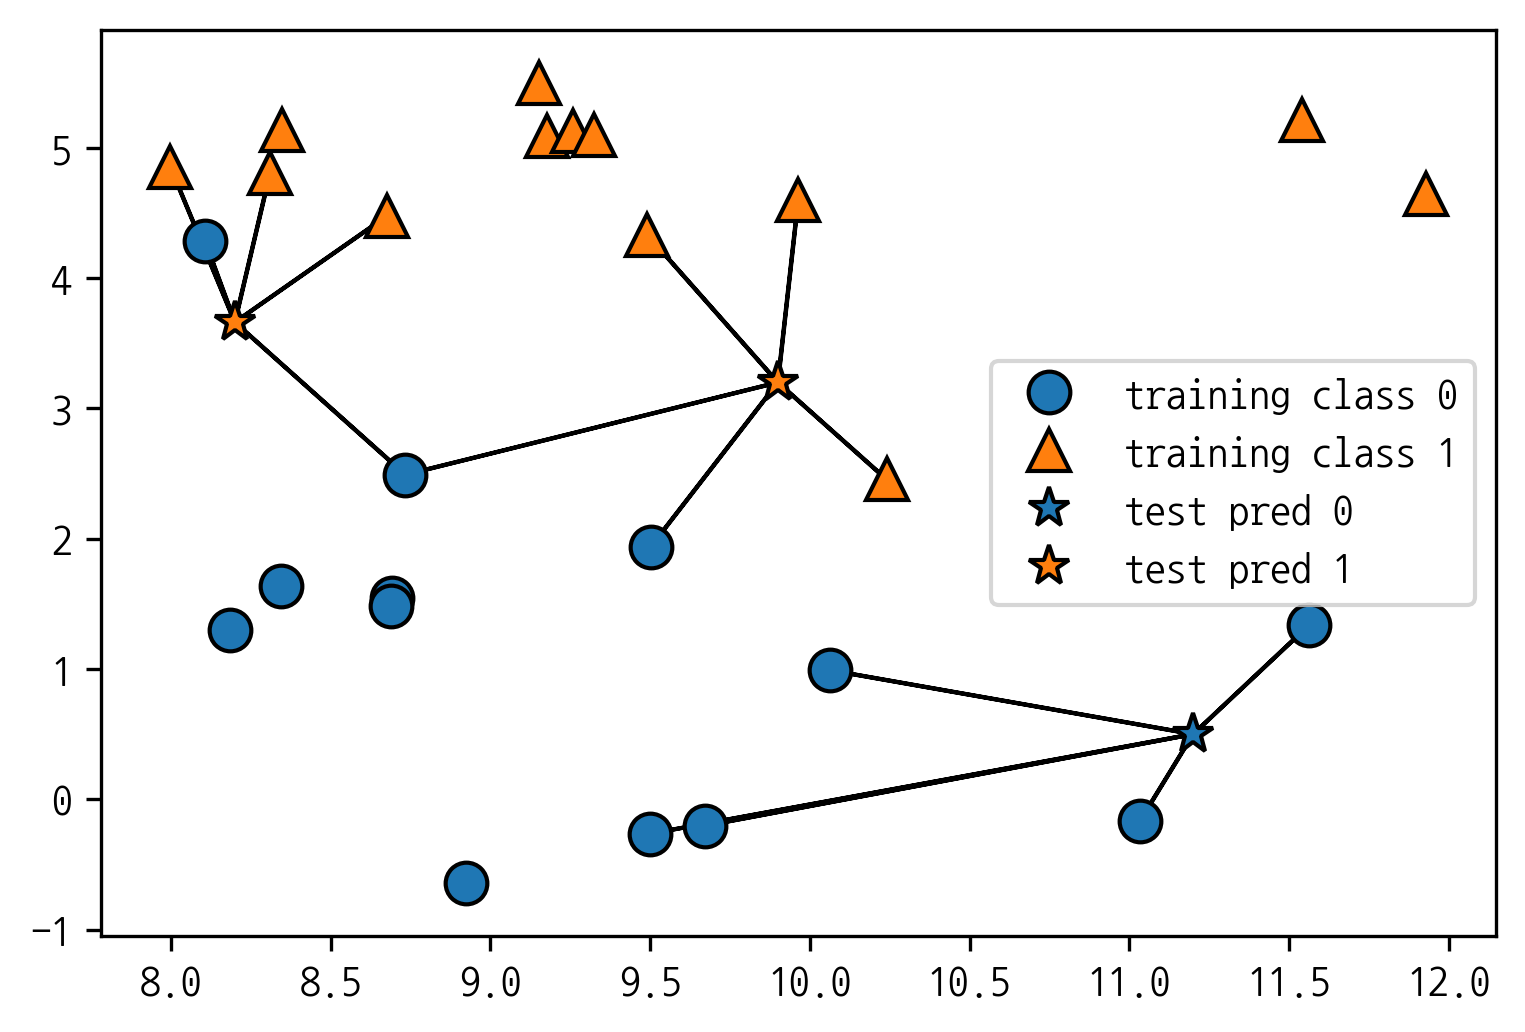

In [6]:
# k=5일 경우(최근접 이웃을 5개로 기준해서 분류)
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [7]:
# sklearn의 KNeighborsClassifier로 기계학습
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
# knn
print('훈련세트점수: {:.3f}'.format(knn.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(knn.score(X_test, y_test)))
print()

print("검증용 데이터 예측: {}".format(knn.predict(X_test)))

훈련세트점수: 0.947
검증세트점수: 0.857

검증용 데이터 예측: [1 1 1 1 0 1 0]


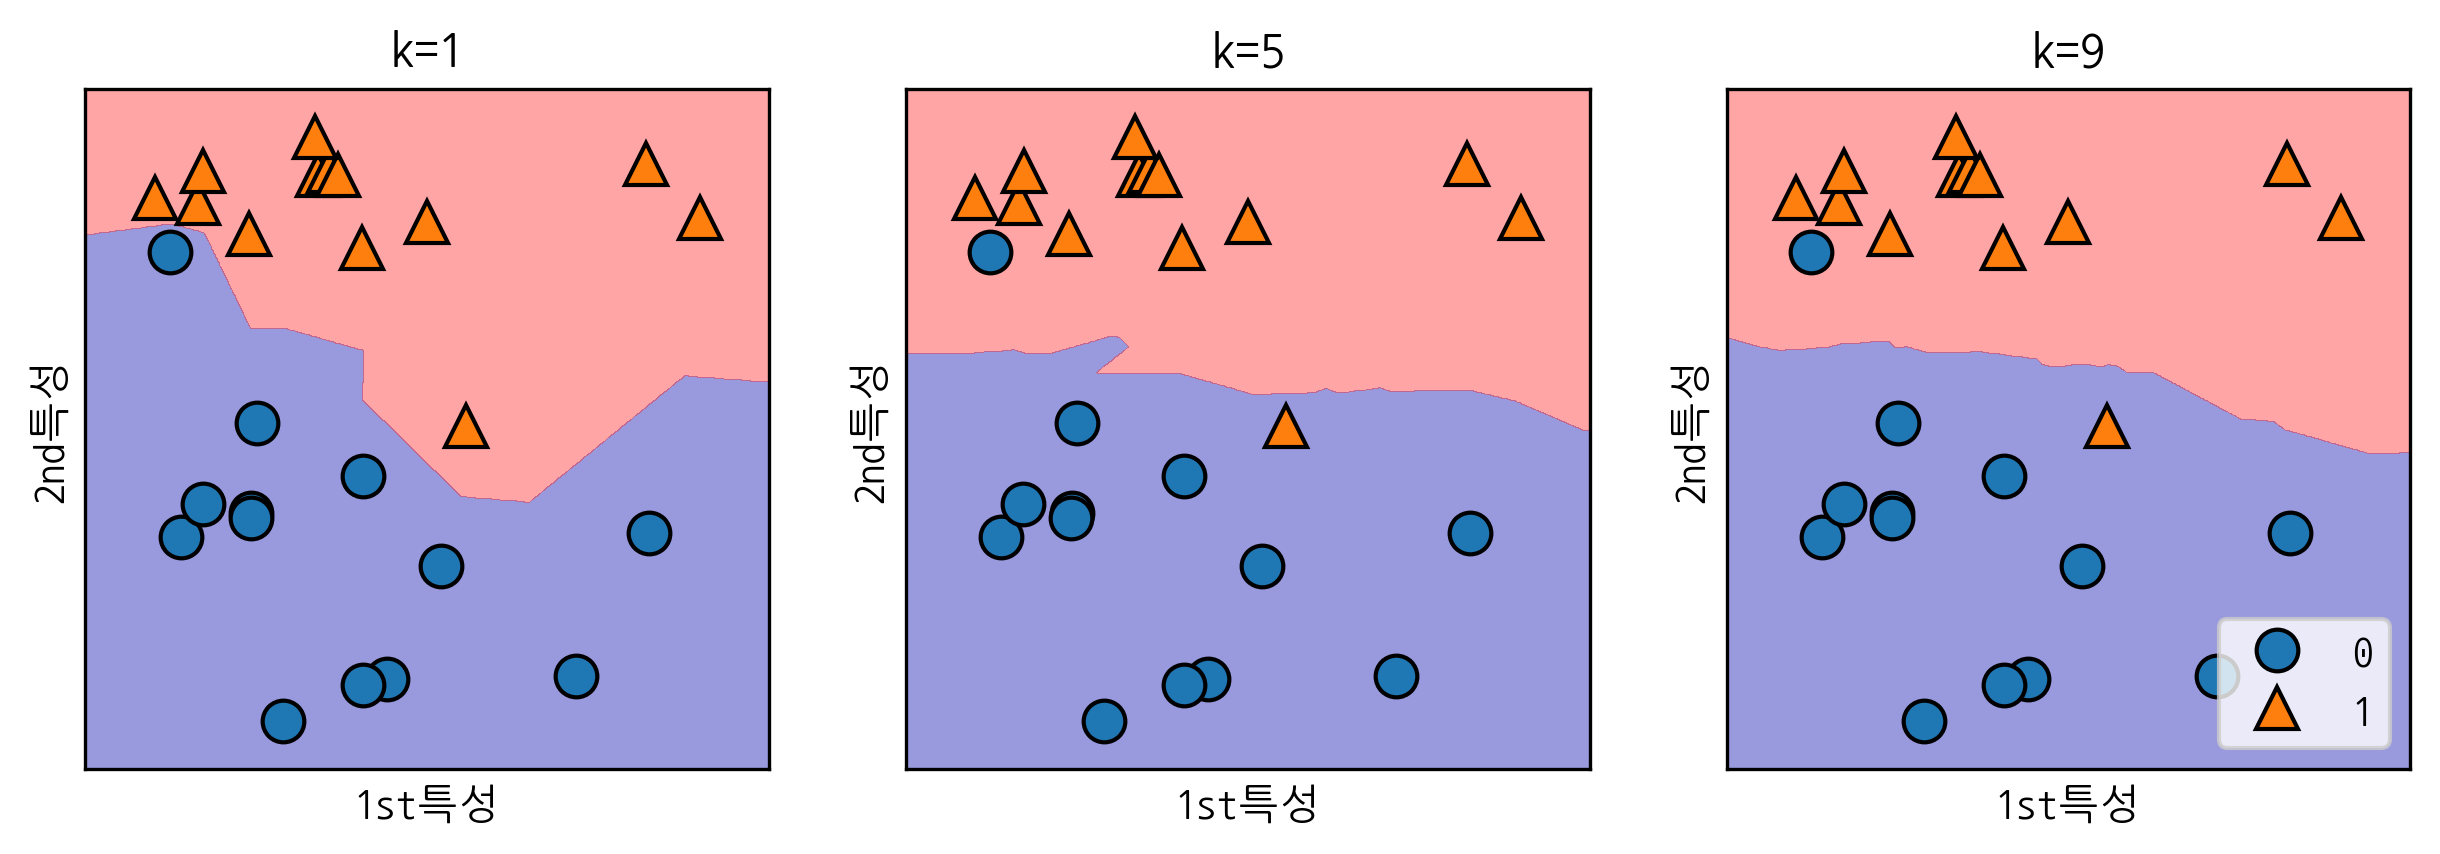

In [8]:
# kNN의 k=1,3,9일때 시각화
fig, axes = plt.subplots(1,3,figsize=(10,3))
#print(axes)

# zip함수는 앞의 값과 뒤의 값을 조합하는 함수
for n, ax in zip([1,5,9], axes):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    
    # 산점도
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    
    # plot_2d_separator()함수는 경계면을 출력해 주는 함수
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    ax.set_title('k={0}'.format(n))
    ax.set_xlabel('1st특성')
    ax.set_ylabel('2nd특성')
    
axes[2].legend(loc=4)
plt.show()

# 결과분석
# k=1:훈련데이터셋에 가깝게 근접함
# 이웃의 갯수를 늘릴수록 결정경께는 더 부드러워 짐(완만해 짐)
# 이웃의 수를 적게 사용하면 모델의 복잡도가 높아지고 많게 하면 복잡도는 낮아 진다.

###### 실습 2. 유방암 데이타셋

In [9]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
print("cancer.key(): {}".format(cancer.keys()))
print("cancer 데이터형태: {}".format(cancer.data.shape)) # (569, 30)
print() 
# 악성 212, 양성 357
print("클래스별 샘플 갯수 :{}".format(\
        {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print() 
print("특성이름 :{}".format(cancer.feature_names))

cancer.key(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
cancer 데이터형태: (569, 30)

클래스별 샘플 갯수 :{'malignant': 212, 'benign': 357}

특성이름 :['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
X_train, X_test, y_train, y_test =\
    train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
train_rate = []
test_rate = []

# kNN은 k의 값에 따라 결과가 달라지므로 어떤 k값이 최적인지 찾아내는 것이 필요
# k값을 1~10까지 n_neighbors를 적용
neighbors = range(1,11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    # 학습용, 검증용 데이터셋의 정확도(예측)
    train_rate.append(knn.score(X_train, y_train))
    test_rate.append(knn.score(X_test, y_test)) 
    
print("학습용데이터셋의 정확도:{}".format(train_rate)) 
print("검증용데이터셋의 정확도:{}".format(test_rate))

학습용데이터셋의 정확도:[1.0, 0.9671361502347418, 0.9507042253521126, 0.9460093896713615, 0.9460093896713615, 0.9483568075117371, 0.9460093896713615, 0.9460093896713615, 0.9389671361502347, 0.9342723004694836]
검증용데이터셋의 정확도:[0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.9300699300699301, 0.9230769230769231, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441]


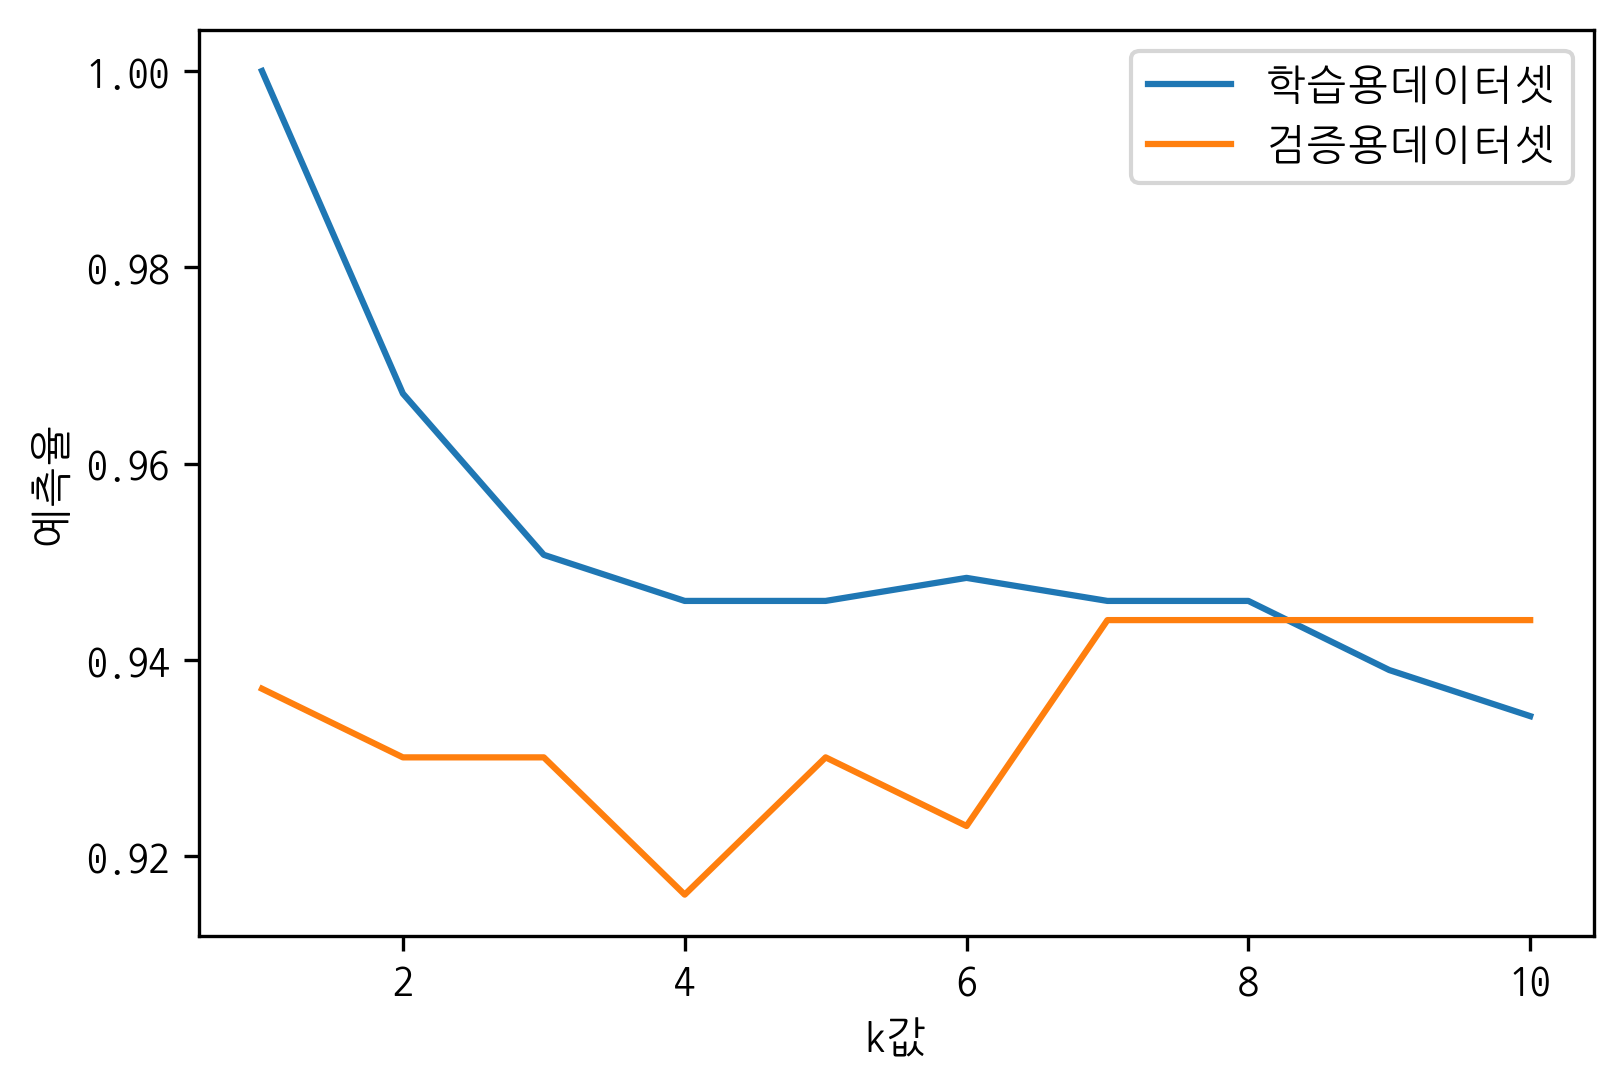

In [11]:
# 결과 시각화
plt.plot(neighbors, train_rate, label="학습용데이터셋")
plt.plot(neighbors, test_rate, label="검증용데이터셋")
plt.xlabel("k값") # 이웃의 갯수
plt.ylabel("예측율") # 정확도
plt.legend()
plt.show()

# 결과분석
# 학습용 데이터셋의 경우 이웃이 1개일 때 100%예측율
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도가 떨어진다.
# k=6으로 했을 경우 테스트의 정확도가 가장 높다.

###### KNN회귀 실습

KNN은 회귀분석에도 사용된다. wave데이터셋을 이용해서 KNN회귀분석을 실습

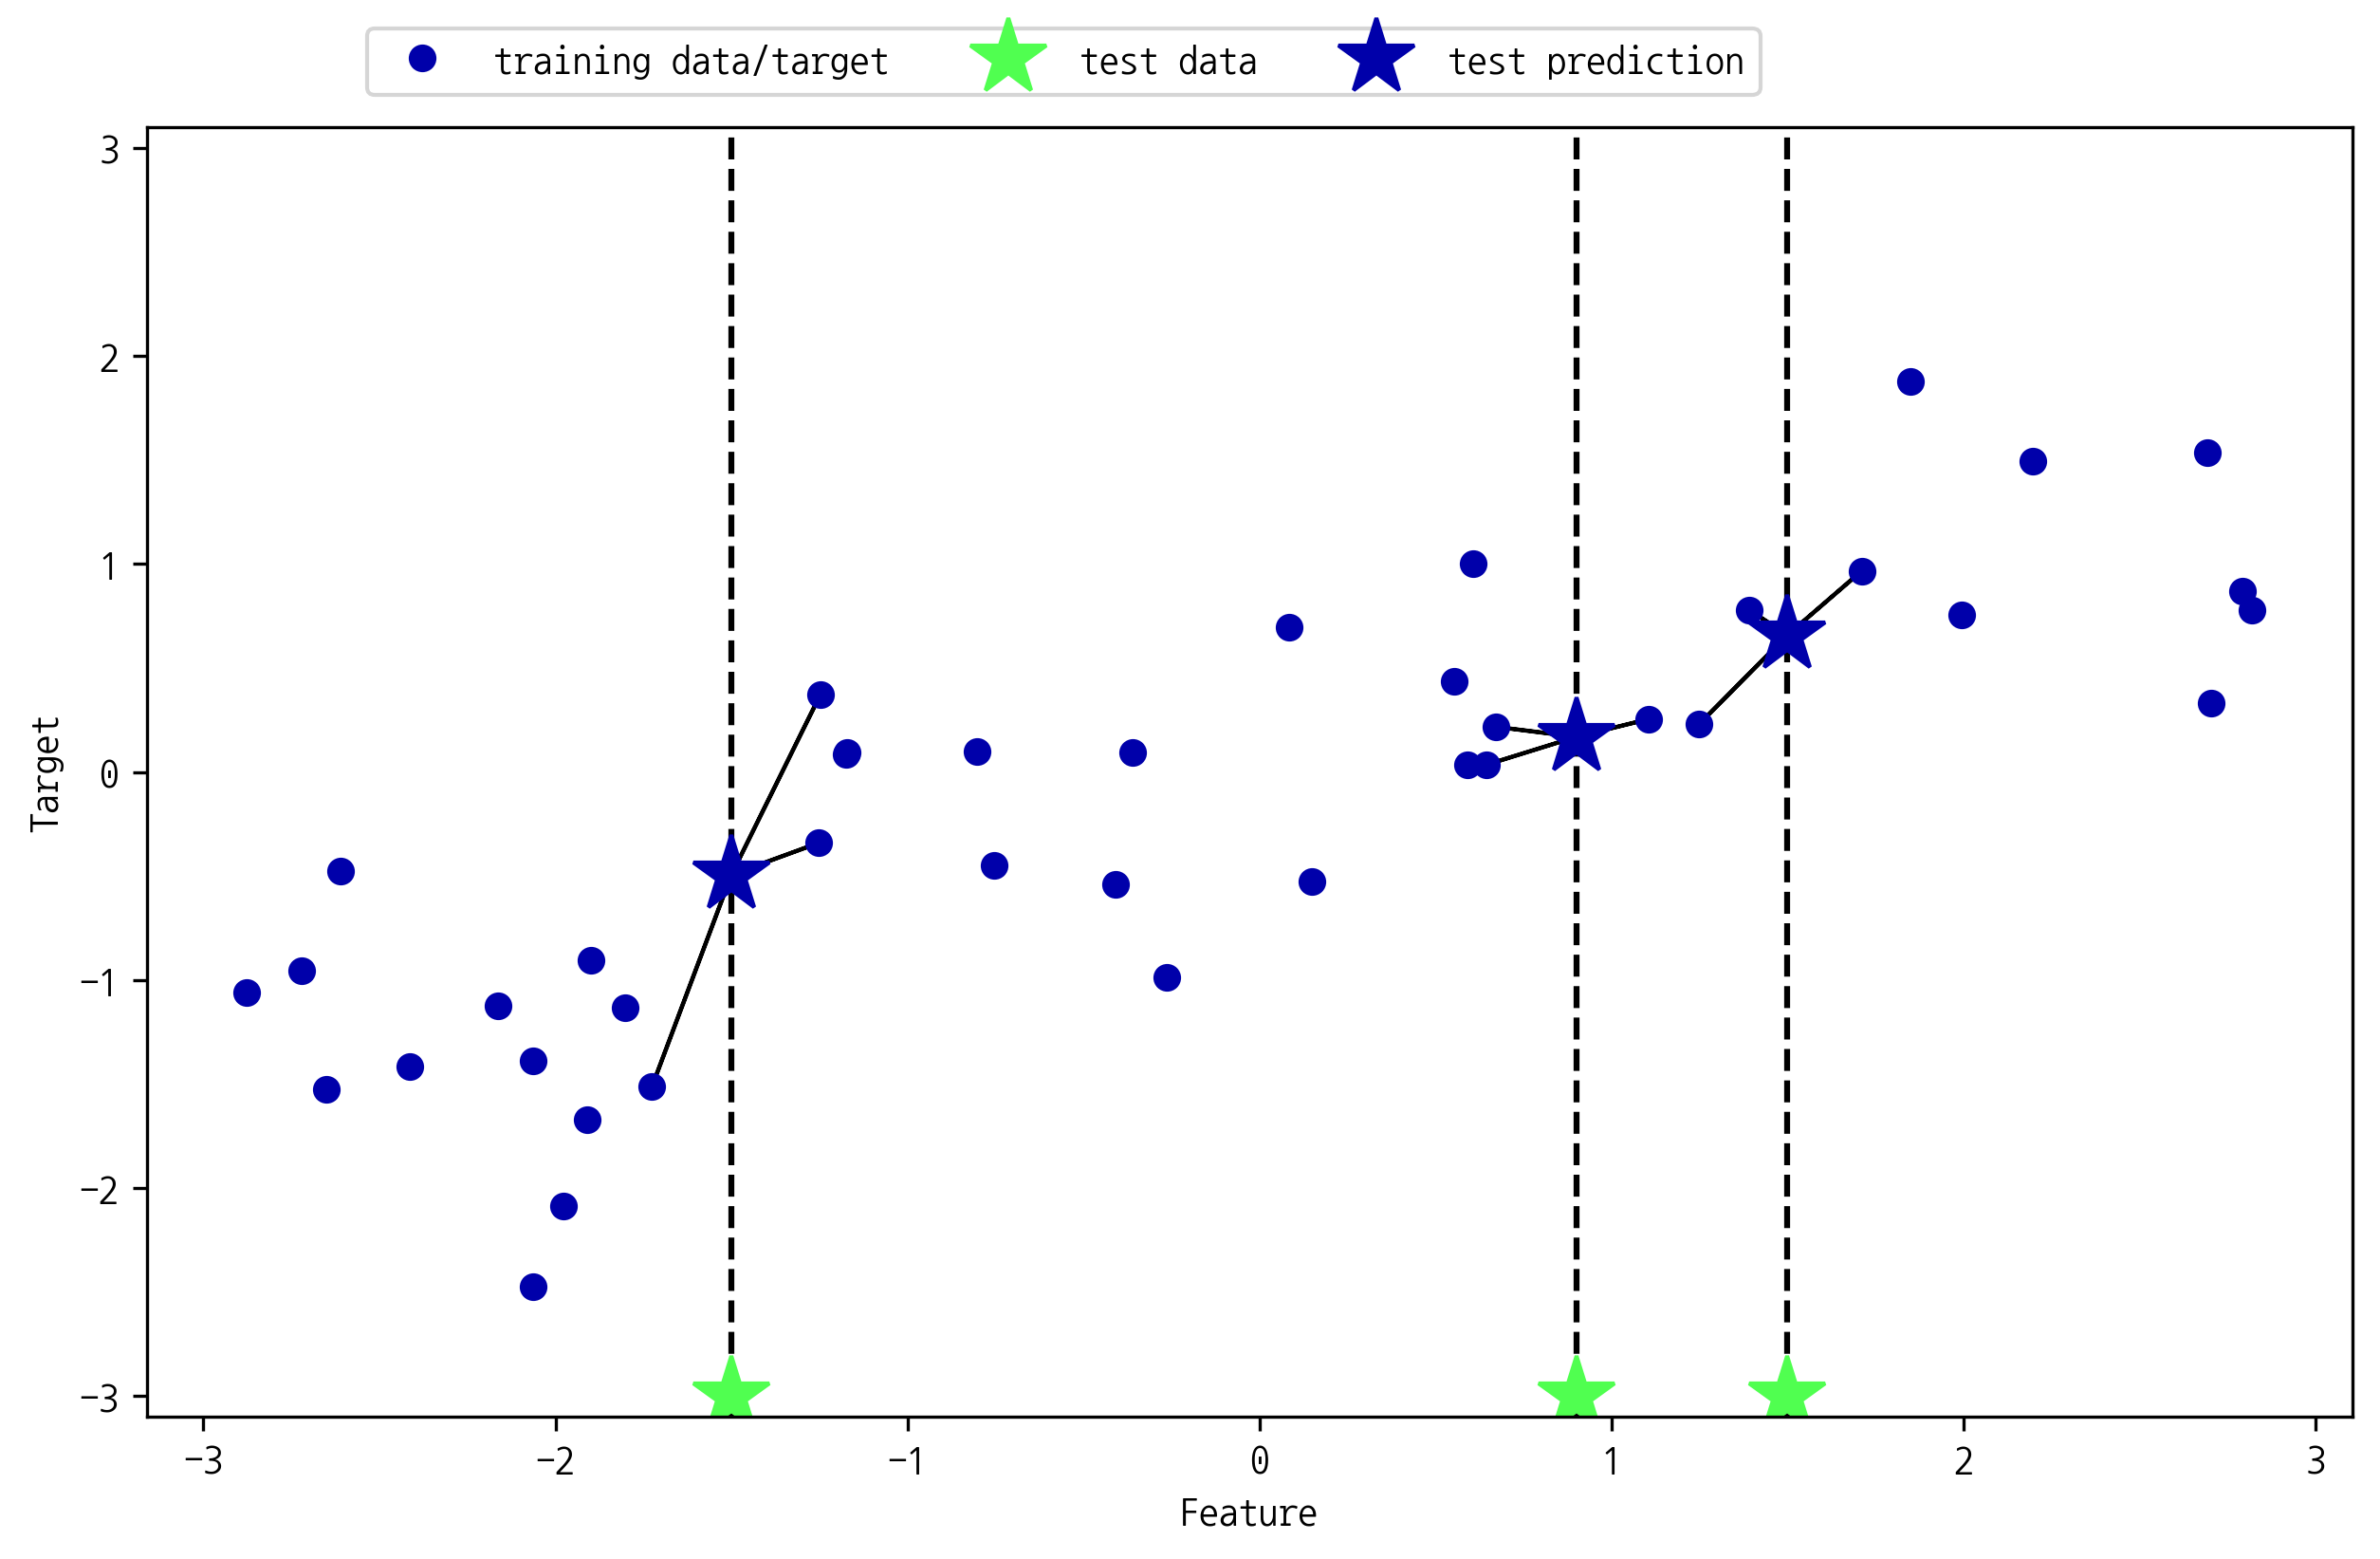

In [12]:
# 3-KNN 회귀모델 예제
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [13]:
# scikit-learn에서 회귀를 위한 KNN알고리즘은 KNeighborsRegressor에 구현되어 있다.
# 사용법은 KNeighborsClassifier와 유사하다.
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40) # 샘플데이터 40개 생성

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

# 결과출력
print('검증세트 예측: {}'.format(knnreg.predict(X_test)))
print('검증세트 R^2: {:.3f}'.format(knnreg.score(X_test, y_test)))

# 결과분석
# score()메서드는 회귀일 때 R2(결정계수)값을 리턴, R2값은 예측의 적합도를 
# 0과 1사이의 값을 계산

검증세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
검증세트 R^2: 0.834


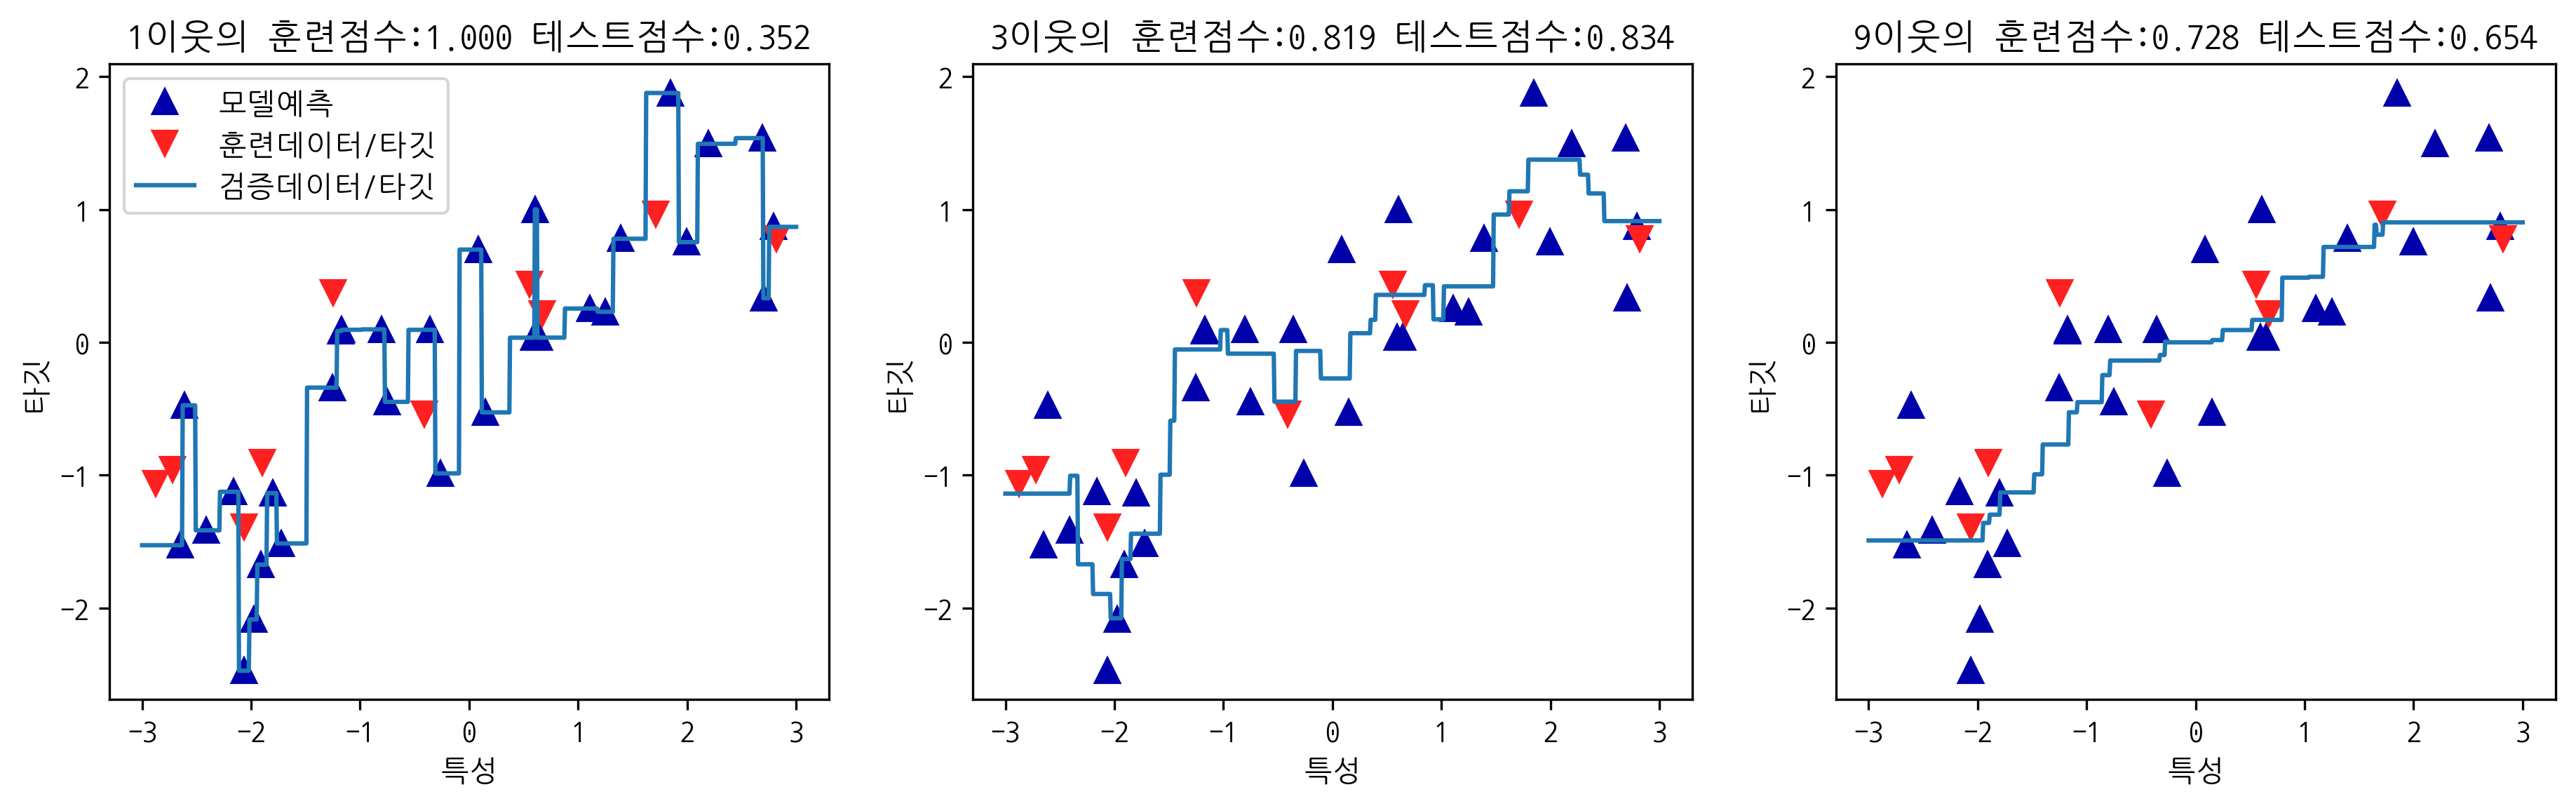

In [14]:
# KNeighborsRegressor 결과를 시각화
fig, axes = plt.subplots(1,3,figsize=(15,4))

# -3과 3사이에 1000개의 데이터포인트를 생성
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n, ax in zip([1,3,9], axes):
    knnreg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.plot(line, knnreg.predict(line))
    ax.set_title("{}이웃의 훈련점수:{:.3f} 테스트점수:{:.3f}".
                format(n, knnreg.score(X_train, y_train), knnreg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel('타깃')
    
axes[0].legend(["모델예측", "훈련데이터/타깃", "검증데이터/타깃"], loc="best")
plt.show()



###### 실습 2. 붓꽃 데이타셋

In [16]:
iris_dataset = datasets.load_iris()
# print(iris)
print('iris 데이터셋의 키: {}'.format(iris_dataset.keys())) 
# 데이터셋에 대한 설명, 앞부분
print(iris_dataset['DESCR'][:200] + '\n...') 
# 예측하려는 붓꽃 품종의 이름
print('타깃의 이름: {}'.format(iris_dataset['target_names'])) 
print('특성의 이름: {}'.format(iris_dataset['feature_names'])) 
print('자료의 타입: {}'.format(type(iris_dataset['data']))) 
print('target: \n{}'.format(type(iris_dataset['target'])))

iris 데이터셋의 키: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
...
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
자료의 타입: <class 'numpy.ndarray'>
target: 
<class 'numpy.ndarray'>


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
print('X_train 크기: {}'.format(X_train.shape))
print('y_train 크기: {}'.format(y_train.shape))

X_train 크기: (112, 4)
y_train 크기: (112,)


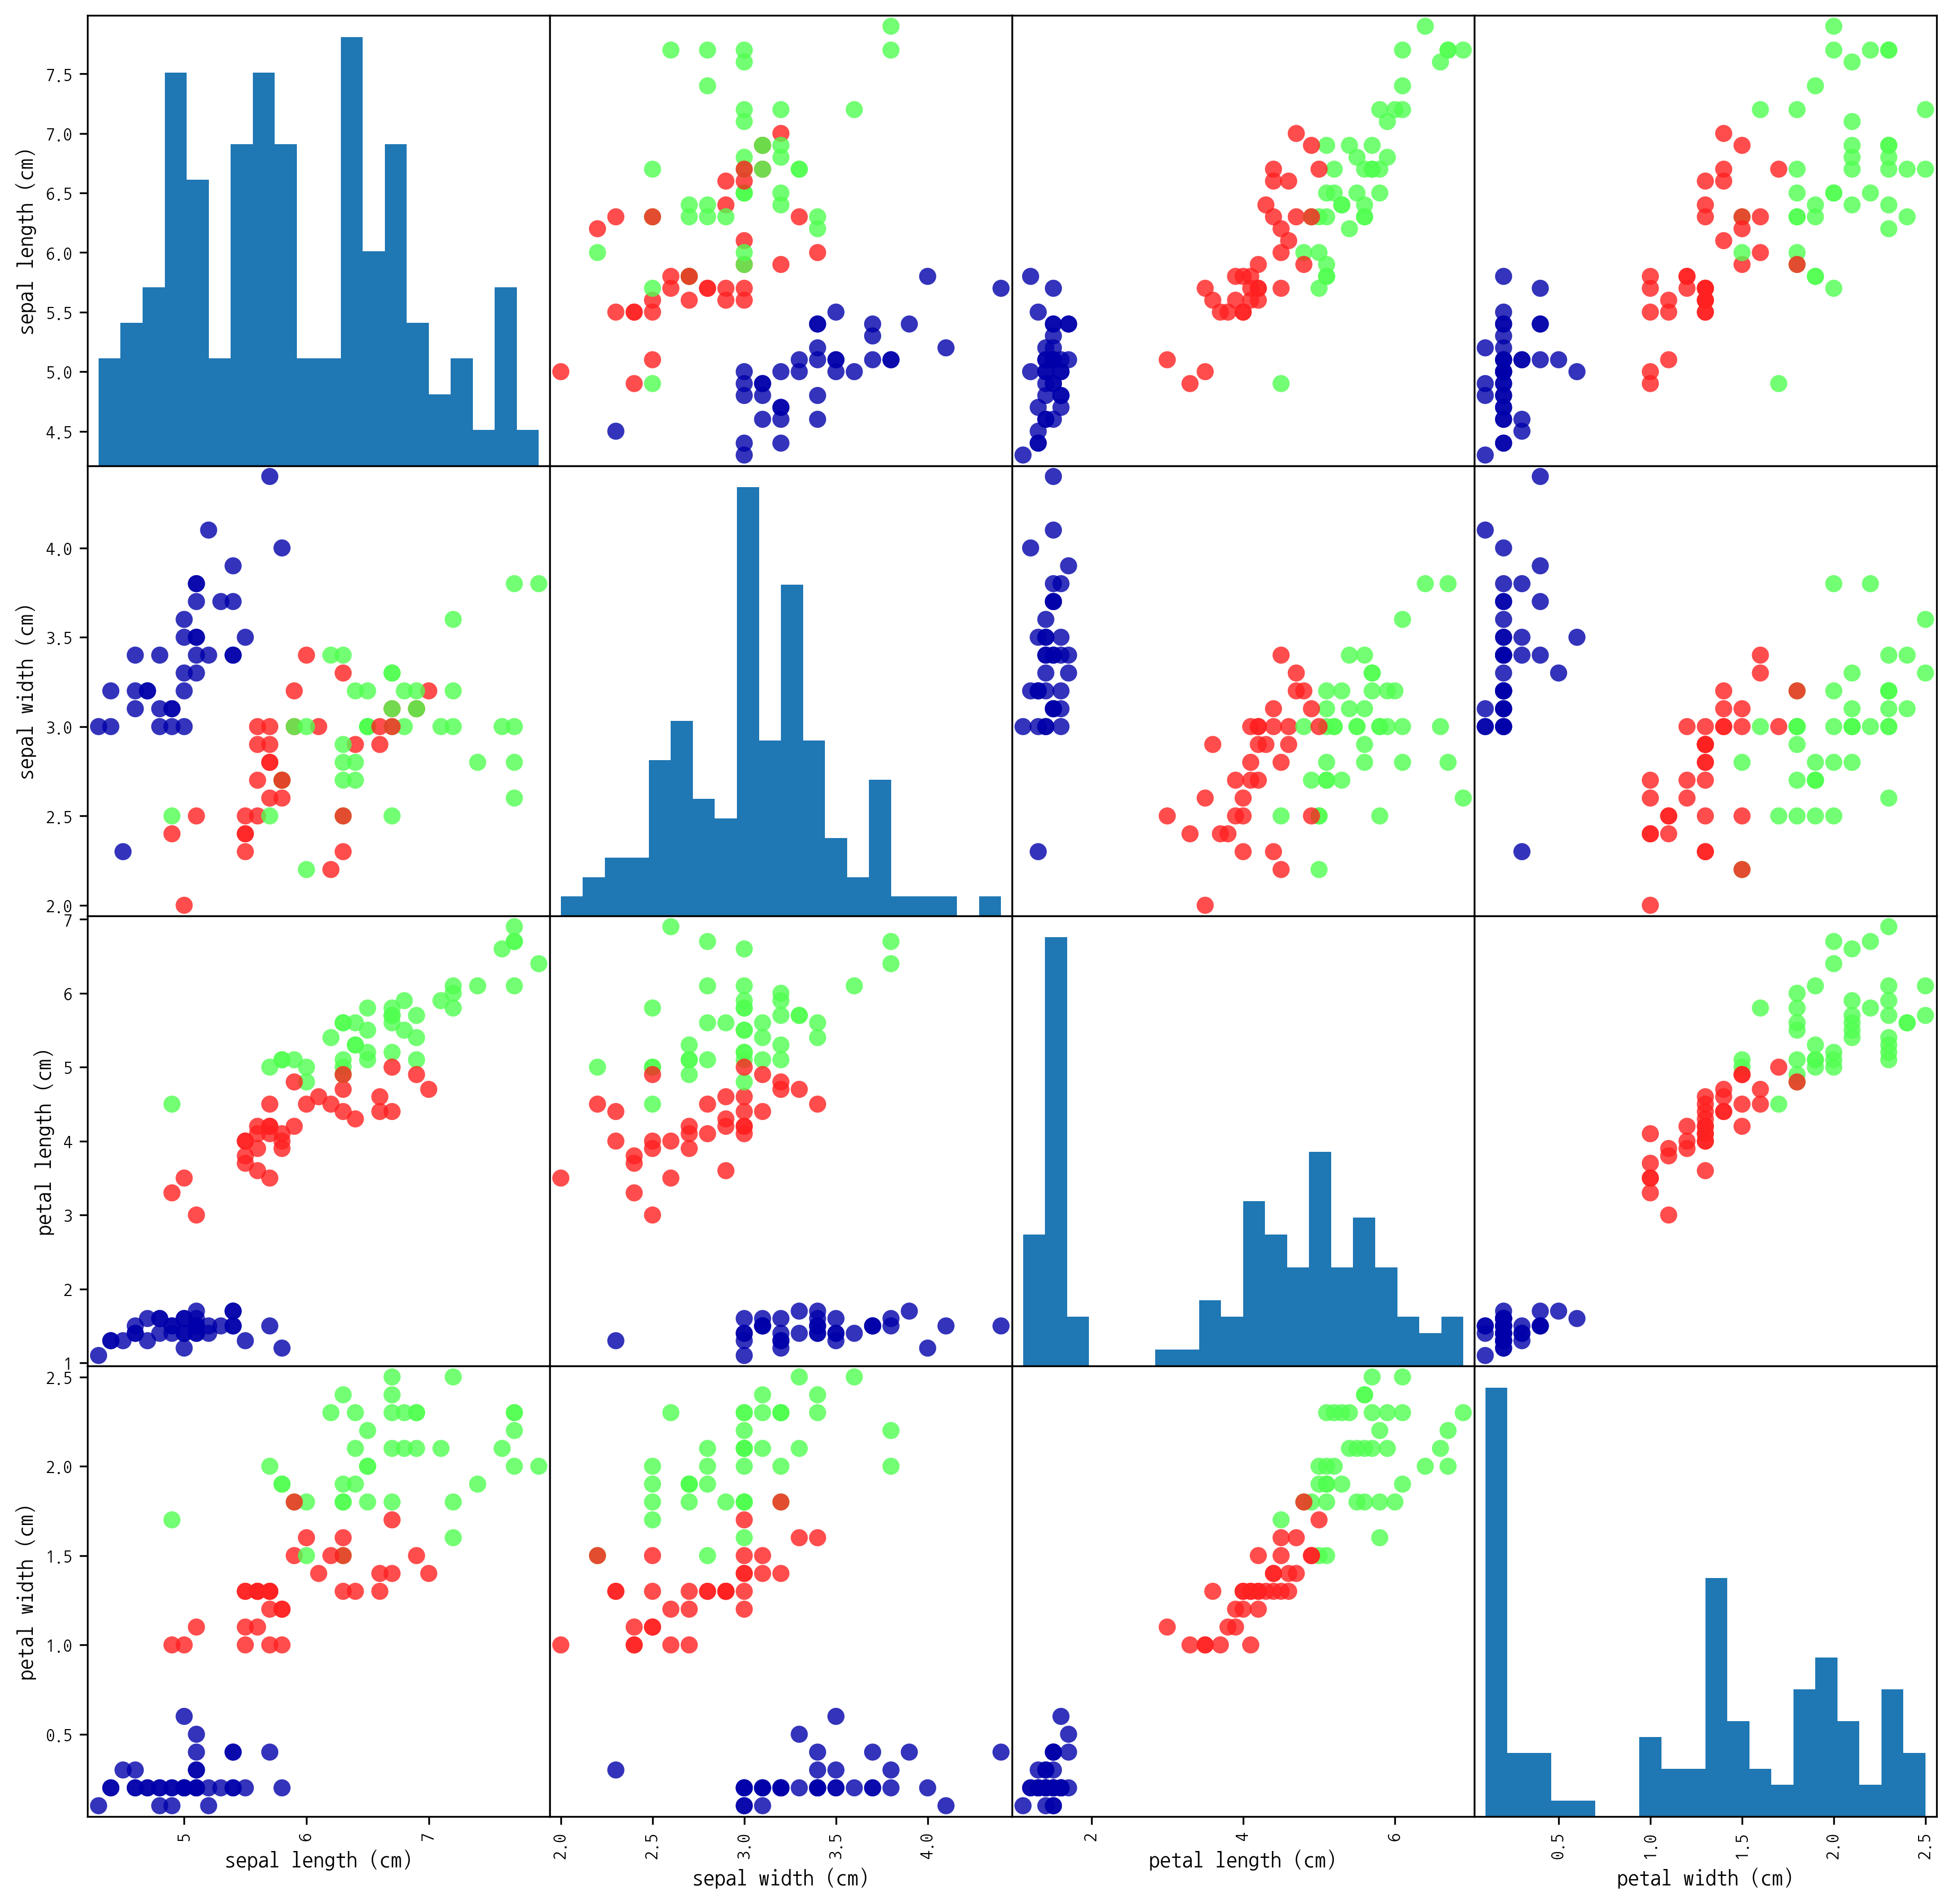

In [18]:
# 데이터의 시각화
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df.head()

# pair산점도
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)
plt.show()

# 그래프를 보면 세가지 클래스가 비교적 잘 구분되어 머신러닝하기에 적합한 데이터이다.
# 입력값이 꽃잎(넓이, 길이), 꽃받침(넓이, 길이) 4개이기 때문에 4x4행렬로 그래프를
# 출력. 이러한 그래프를 산점도행렬그래프라고 한다.

In [19]:
# 학습시키기
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [21]:
# 새로운 붓꽃 입력
# 꽃받침(길이=5.0cm, 넓이=2.0cm) 꽃잎(길이=5.0cm, 넓이=1.2cm)인 붓꽃의 품종은?
X_new = np.array([[5.0, 2.0, 5.0, 1.2]])
print('입력 데이터: {}'.format(X_new.shape))
prediction = knn.predict(X_new)
print("예측결과: {}".format(prediction))
print("예측한 붓꽃의 품종: {}".format(iris_dataset['target_names'][prediction]))

입력 데이터: (1, 4)
예측결과: [2]
예측한 붓꽃의 품종: ['virginica']


In [22]:
# 모델평가
y_pred = knn.predict(X_test)
y_pred
print("검증용 데이터셋에 대한 품종예측결과: \n{}".format(y_pred))

검증용 데이터셋에 대한 품종예측결과: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [23]:
# 예측율을 출력방법 2가지
print("검증용 데이터셋에 대한 정확도: {:.3f}".format(knn.score(X_test, y_test)))
print("검증용 데이터셋에 대한 정확도: {:.3f}".format(np.mean(y_pred == y_test)))

검증용 데이터셋에 대한 정확도: 0.974
검증용 데이터셋에 대한 정확도: 0.974


In [24]:
print('{}'.format(y_pred == y_test))

# 결과분석
# 마지막자료만 불일치해서 97.4% 예측율

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


##### KNN의 유클리드거리 실습

* 참고 : https://ratsgo.github.io/machine%20learning/2017/04/17/KNN/

#### 학습용 데이터셋

카테고리는 `'과일', '채소', '단백질'` 3가지로 구분하고 데이터의 `단맛,아삭거림의 정도`에 따라 카테고리가 결정되는 실습. 단맛과, 아삭거림의 정도를 사용자에게 입력받아서 `target이라는 새롭게 분류할 데이터`를 생성

In [25]:
# 학습용데이터셋
grape = [8, 5]
fish = [2, 3]
carrot = [7, 10]
orange = [7, 3]
celery = [3, 8]
cheese = [1, 1]
category = ['과일', '단백질', '채소', '과일', '채소', '단백질']

# 분류대상
dan = int(input('단맛 입력(1~10):'))
asac =  int(input('아삭거림 입력(1~10):'))
target = [dan, asac]

단맛 입력(1~10):6
아삭거림 입력(1~10):7


In [26]:
# 데이터전처리 : 분석하기 쉬운 dataset으로 만들기 위한 함수 생성
def data_set():
    dataset = [grape, fish, carrot, orange, celery, cheese] # 분류집단
    size = len(dataset)
    class_target = np.tile(target, (size, 1)) # 분류대상
    # print(class_target.shape)
    calss_category = np.array(category) # 분류크래스(정답)
    # print(calss_category.shape)
    return dataset, class_target, calss_category

In [27]:
# dataset생성
dataset, class_target, calss_category = data_set()
calss_category

array(['과일', '단백질', '채소', '과일', '채소', '단백질'], dtype='<U3')

In [30]:
# 유클리드거리계산함수를 생성
# 계산식을 이용해서 분류할 대상과 분류할 범주와의 거리를 구한 후
# 가까운 거리에 있는 순으로 오름차순으로 정렬한 후 그 값에 따라서
# 어떤 카테고리인지에 가까운지를 분류한다.
def classify(dataset, class_target, class_category, k):
    # 유클리드거리계산
    diffMat = class_target - dataset # 두점과의 차이
    #print(diffMat)
    sqDiffMat = diffMat**2           # 두점과의 차에 대한 제곱
    #print(sqDiffMat)
    row_sum = sqDiffMat.sum(axis=1)  # 차의 제곱에 대한 합
    #print(row_sum)
    distance = np.sqrt(row_sum)      # 합의 제곱근(최종거리)
    #print(distance)
    
    # 가까운거리 오름차순으로 정렬
    sortDist = distance.argsort()
    #print(sortDist)
    
    # 이웃한 K개 선정
    class_result = {}
    for i in range(k):
        c = class_category[sortDist[i]]
        class_result[c] = class_result.get(c,0) + 1
    
    return class_result

In [31]:
k = int(input('이웃의 갯수(k값:1~3):'))
class_result = classify(dataset, class_target, calss_category, k)
print(class_result)

이웃의 갯수(k값:1~3):3
{'과일': 1, '채소': 2}


In [32]:
def classify_result(class_result):
    protein = fruit = vegetable = 0
    
    for c in class_result.keys():
        if c == "단백질":
            protein = class_result[c]
        elif c == '과일':
            fruit = class_result[c]
        else:
            vegetable = class_result[c]
    
    if protein > fruit and protein > vegetable:
        result = "분류는 단백질입니다!"
    elif fruit > protein and fruit > vegetable:
        result = "분류는 과일입니다!"
    else:
        result = "분류는 채소입니다!"
    
    return result

In [33]:
print(classify_result(class_result))

분류는 채소입니다!


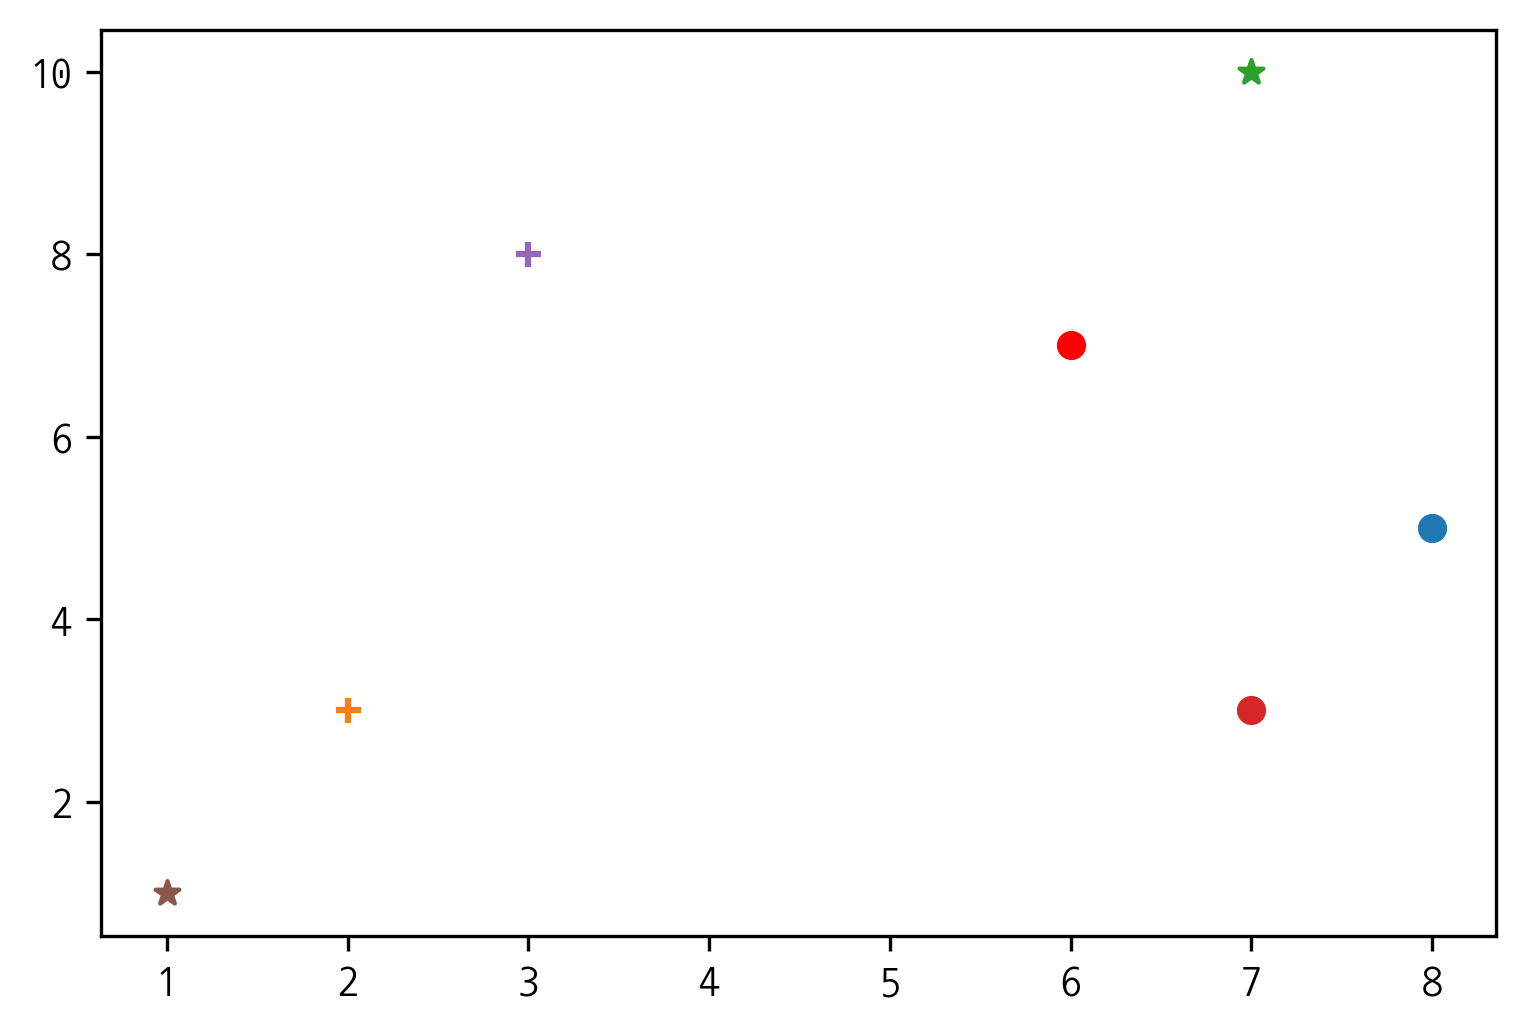

In [34]:
# 그래프 시각화
# 시각화 o=과일, +=단백질, *=채소
plt.scatter(8,5,marker='o')
plt.scatter(2,3,marker='+')
plt.scatter(7,10,marker='*')
plt.scatter(7,3,marker='o')
plt.scatter(3,8,marker='+')
plt.scatter(1,1,marker='*')
plt.scatter(dan, asac, color="red") # 분류대상
plt.show()

$$f(x) = W * X        Y = acrivefunction(f(x))$$